In [1]:
from AE.model.autoencoder import Autoencoder
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import numpy as np
import pickle
import torch
from config import hp, model_config

In [2]:
data_route = 'data/complex_noisy_data.pkl'
file = open(data_route,'rb')
X = pickle.load(file)
#X = np.loadtxt(data_route, delimiter = ",")
X = (X - X.min())/(X.max() - X.min())
print(X.shape)
subset = X[np.random.randint(0,X.shape[0], size = 1), :][0]

(29477, 134)


In [3]:
# Number of sample points
N = 134
# sample spacing
T = 1/ 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = subset
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

In [4]:
model = Autoencoder(model_config)
model.load_state_dict(torch.load('model_ckpts/model.pth'))
y_new = model(torch.tensor(y).float().unsqueeze(0).unsqueeze(0))
y_new= y_new[0].detach().numpy().reshape(134)

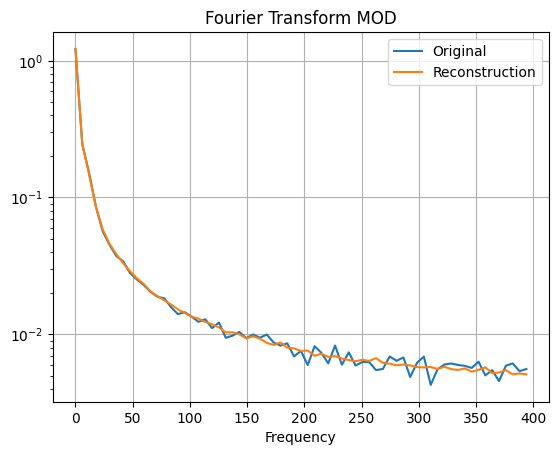

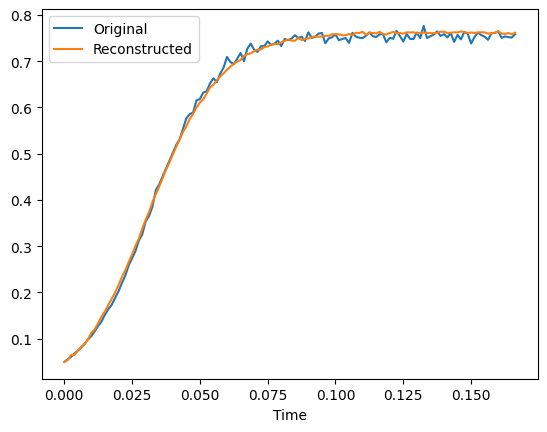

In [5]:
N = 134
# sample spacing
T = 1/ 800.0

yf_new = fft(y_new)
xf = fftfreq(N, T)[:N//2]
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_new[0:N//2]))

plt.title("Fourier Transform MOD")
plt.xlabel('Frequency')
plt.legend(['Original', 'Reconstruction'])
plt.yscale('log')
plt.grid()
plt.show()


plt.figure() 
plt.plot(x,y)
plt.plot(x,y_new)
plt.legend(['Original', 'Reconstructed'])
plt.xlabel('Time')
plt.show()

134

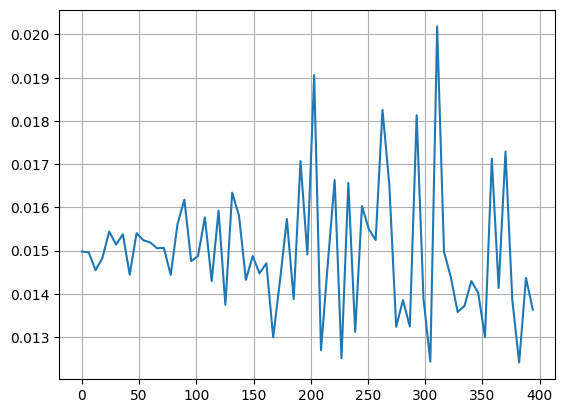

In [6]:
# x * h = y 
# h = y/x

hf = yf_new / yf

plt.figure()
plt.plot(xf, 2.0/N * np.abs(hf[0:N//2]))
plt.grid()
plt.show()


In [49]:
m = np.array([20,20,20,20,20,20,20])
l = np.array([2,2,2,2,2,2,2])


m / l

array([10., 10., 10., 10., 10., 10., 10.])